In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import re

In [5]:
import seaborn as sns 

In [6]:
from sklearn.cluster import KMeans

In [7]:
from sklearn.cluster import DBSCAN

In [8]:
n = r'C:\Users\Kush baba the great\Desktop\Datashapa\datasets\cluster\OnlineRetail1.csv'

In [9]:
df = pd.read_csv(n,encoding="unicode_escape")

initial exploration

In [10]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,01-12-2010 08:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,01-12-2010 08:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,01-12-2010 08:34,1.69,13047.0,United Kingdom


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Nullvalues: CustomerID

DataType change: InvoiceNo has string value in the column so need to modify value before converting to int

Column manipulation: InvoiceDate

Encoding: Country 

DATA CLEANING

In [12]:
#Drop "Description" column
df = df.drop(["Description"],axis=1)

NULL VALUES

In [13]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [14]:
#Drop Null values from CustomerID column
df.dropna(subset=["CustomerID"],inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Quantity     406829 non-null  int64  
 3   InvoiceDate  406829 non-null  object 
 4   UnitPrice    406829 non-null  float64
 5   CustomerID   406829 non-null  float64
 6   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 24.8+ MB


CHANGE DATA TYPE

In [16]:
#Change data type. The InvoiceNO has a column C536379 which can't be converted to an int so replace the vlaue with 536379
df["InvoiceNo"] = df["InvoiceNo"].apply(lambda x: re.sub(r'\D','',x))

In [17]:
#Convert the column value to int
df["InvoiceNo"] = df["InvoiceNo"].astype(int)

In [18]:
#Change data type of Stockcode as well. get rid of the alpha values first
df["StockCode"] = df["StockCode"].apply(lambda x: re.sub(r'\D','',x))

In [19]:
df["StockCode"] = df["StockCode"].str.strip()

In [20]:
#Get rid of empty strings in StockCode column
df = df[df["StockCode"]!='']

In [21]:
df["StockCode"] = df["StockCode"].astype(int) 

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405043 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    405043 non-null  int32  
 1   StockCode    405043 non-null  int32  
 2   Quantity     405043 non-null  int64  
 3   InvoiceDate  405043 non-null  object 
 4   UnitPrice    405043 non-null  float64
 5   CustomerID   405043 non-null  float64
 6   Country      405043 non-null  object 
dtypes: float64(2), int32(2), int64(1), object(2)
memory usage: 21.6+ MB


InvoiceDate (DATETIME) COLUMN ENCODING

In [23]:
#Change the data type first
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format="%d-%m-%Y %H:%M")

In [24]:
# Extract components of the date and time 
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour


In [25]:
#Drop InvoiceDate as we have created new columns with the values 
df = df.drop(["InvoiceDate"],axis=1)

In [26]:
df.head()

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country,Year,Month,Day,Hour
0,536365,85123,6,2.55,17850.0,United Kingdom,2010,12,1,8
1,536365,71053,6,3.39,17850.0,United Kingdom,2010,12,1,8
2,536365,84406,8,2.75,17850.0,United Kingdom,2010,12,1,8
3,536365,84029,6,3.39,17850.0,United Kingdom,2010,12,1,8
4,536365,84029,6,3.39,17850.0,United Kingdom,2010,12,1,8


Country (CATEGORICAL) COLUMN ENCODING 

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])

In [29]:
# Only the Description and InvoiceDate have Non numerical value so we should be good to start the clustering process 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405043 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   InvoiceNo   405043 non-null  int32  
 1   StockCode   405043 non-null  int32  
 2   Quantity    405043 non-null  int64  
 3   UnitPrice   405043 non-null  float64
 4   CustomerID  405043 non-null  float64
 5   Country     405043 non-null  int32  
 6   Year        405043 non-null  int64  
 7   Month       405043 non-null  int64  
 8   Day         405043 non-null  int64  
 9   Hour        405043 non-null  int64  
dtypes: float64(2), int32(3), int64(5)
memory usage: 29.4 MB


In [30]:
df.head(10)

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country,Year,Month,Day,Hour
0,536365,85123,6,2.55,17850.0,35,2010,12,1,8
1,536365,71053,6,3.39,17850.0,35,2010,12,1,8
2,536365,84406,8,2.75,17850.0,35,2010,12,1,8
3,536365,84029,6,3.39,17850.0,35,2010,12,1,8
4,536365,84029,6,3.39,17850.0,35,2010,12,1,8
5,536365,22752,2,7.65,17850.0,35,2010,12,1,8
6,536365,21730,6,4.25,17850.0,35,2010,12,1,8
7,536366,22633,6,1.85,17850.0,35,2010,12,1,8
8,536366,22632,6,1.85,17850.0,35,2010,12,1,8
9,536367,84879,32,1.69,13047.0,35,2010,12,1,8


TRANSFORM DATA 

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
#Create an instance of standardScaler
scaler = StandardScaler()

SCALE EACH COLUMN SEPARATELY

In [33]:
scaled_InvoiceNo = scaler.fit_transform(df["InvoiceNo"].values.reshape(-1, 1))

In [34]:
df["InvoiceNo"] = scaled_InvoiceNo

In [35]:
scaled_StockCode = scaler.fit_transform(df["StockCode"].values.reshape(-1, 1))

In [36]:
df["StockCode"] = scaled_StockCode

In [37]:
scaled_Quantity = scaler.fit_transform(df["Quantity"].values.reshape(-1, 1))

In [38]:
df["Quantity"] = scaled_Quantity

In [39]:
scaled_UnitPrice = scaler.fit_transform(df["UnitPrice"].values.reshape(-1, 1))

In [40]:
df["UnitPrice"] = scaled_UnitPrice

In [41]:
scaled_CustomerID = scaler.fit_transform(df["CustomerID"].values.reshape(-1, 1))

In [42]:
df["CustomerID"] = scaled_CustomerID

In [43]:
scaled_Country = scaler.fit_transform(df["Country"].values.reshape(-1, 1))

In [44]:
df["Country"] = scaled_Country

In [45]:
scaled_Year = scaler.fit_transform(df["Year"].values.reshape(-1, 1))

In [46]:
df["Year"] = scaled_Year

In [47]:
scaled_Month = scaler.fit_transform(df["Month"].values.reshape(-1, 1))

In [48]:
df["Month"] = scaled_Month

In [49]:
scaled_Day = scaler.fit_transform(df["Day"].values.reshape(-1, 1))

In [50]:
df["Day"] = scaled_Day

In [51]:
scaled_Hour = scaler.fit_transform(df["Hour"].values.reshape(-1, 1))

In [52]:
df["Hour"] = scaled_Hour

In [62]:
df.describe()

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,cluster
count,4.050430e+05,4.050430e+05,4.050430e+05,4.050430e+05,4.050430e+05,4.050430e+05,4.050430e+05,4.050430e+05,4.050430e+05,4.050430e+05,405043.000000
mean,-5.785404e-14,-7.648779e-15,-2.032207e-16,-4.162876e-14,5.769126e-16,-2.873565e-14,9.106973e-13,1.167069e-12,-1.705776e-14,6.133492e-14,0.530593
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,0.617345
min,-1.847873e+00,-1.491939e+00,-3.250737e+02,-6.458758e-01,-1.724286e+00,-4.925260e+00,-3.761085e+00,-1.932443e+00,-1.621864e+00,-2.950084e+00,0.000000
25%,-8.739245e-01,-4.235323e-01,-4.053885e-02,-3.690803e-01,-7.752934e-01,3.182697e-01,2.658807e-01,-7.624859e-01,-9.285118e-01,-7.611759e-01,0.000000
50%,9.834589e-02,-3.926350e-01,-2.850014e-02,-2.140748e-01,-7.948217e-02,3.182697e-01,2.658807e-01,1.149823e-01,-4.042128e-03,1.143872e-01,0.000000
75%,8.760554e-01,-3.634354e-01,-4.098078e-04,1.845107e-01,8.765274e-01,3.182697e-01,2.658807e-01,9.924506e-01,8.048688e-01,5.521687e-01,1.000000
max,1.602492e+00,2.883742e+00,3.249766e+02,1.431771e+02,1.749507e+00,4.680849e-01,2.658807e-01,1.284940e+00,1.844897e+00,3.178858e+00,2.000000


K-MEANS CLUSTER MODEL

In [54]:
#Choose number of cluster
K = 3

In [55]:
#Create K-MEANS model
kmeans = KMeans(n_clusters=K)

In [56]:
#Fit the model to data 
kmeans.fit_predict(df)

array([2, 2, 2, ..., 0, 0, 0])

In [57]:
labels = kmeans.labels_

In [58]:
df["cluster"] = labels

In [59]:
centroids = kmeans.cluster_centers_

VISUALIZING CLUSTER

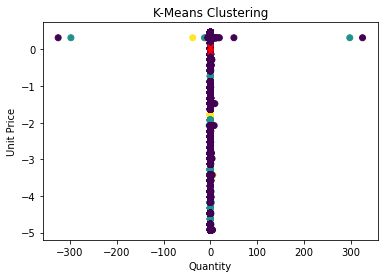

In [61]:
plt.scatter(x=df["Quantity"],y=df["Country"],c =df["cluster"])
plt.scatter(centroids[:,2],centroids[:,5],c ="red",marker="x")

plt.xlabel("Quantity")
plt.ylabel("Unit Price")
plt.title('K-Means Clustering')
plt.show()

C:\Users\Kush baba the great\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Kush baba the great\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Kush baba the great\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Kush baba the great\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Kush baba the great\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Kush baba t

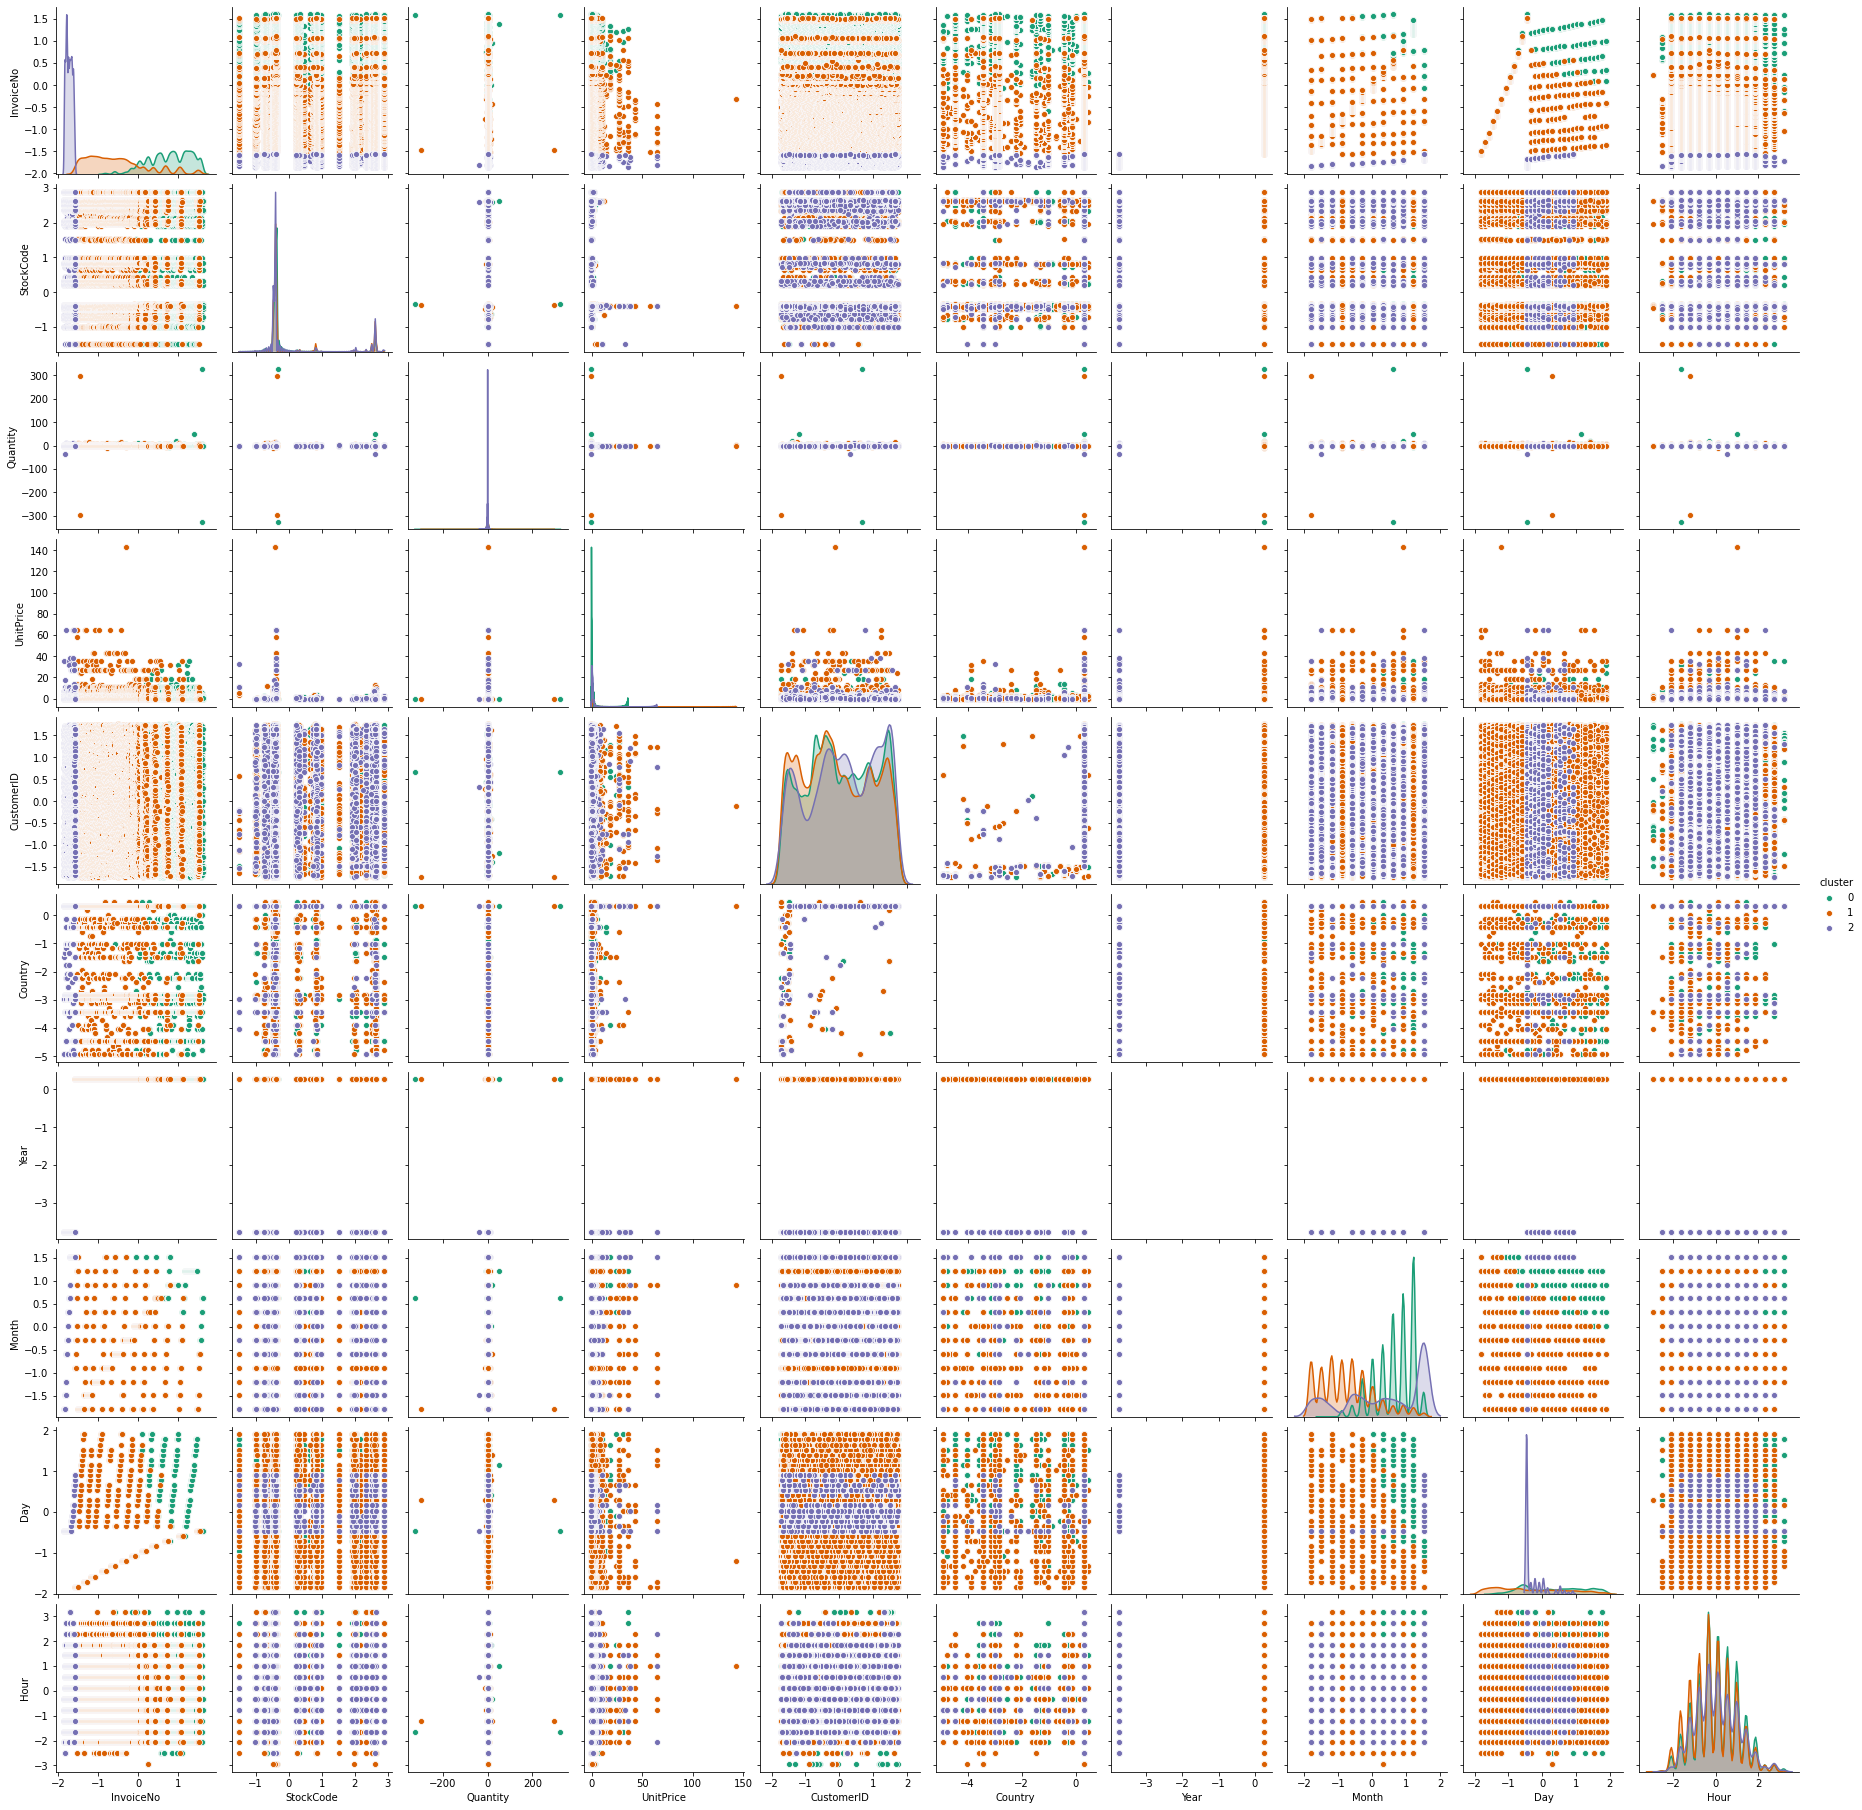

In [85]:
sns.pairplot(df, hue='cluster', palette='Dark2')
plt.show()

DBScan CLUSTER MODEL

In [63]:
df.head()

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,cluster
0,-1.847873,2.636806,-0.024487,-0.081213,1.493987,0.31827,-3.761085,1.28494,-1.621864,-2.074521,2
1,-1.847873,1.954348,-0.024487,0.104794,1.493987,0.31827,-3.761085,1.28494,-1.621864,-2.074521,2
2,-1.847873,2.602028,-0.016461,-0.036926,1.493987,0.31827,-3.761085,1.28494,-1.621864,-2.074521,2
3,-1.847873,2.583742,-0.024487,0.104794,1.493987,0.31827,-3.761085,1.28494,-1.621864,-2.074521,2
4,-1.847873,2.583742,-0.024487,0.104794,1.493987,0.31827,-3.761085,1.28494,-1.621864,-2.074521,2


In [363]:
dbscan = DBSCAN(eps=0.3, min_samples=5)

In [ ]:
dbscan.fit_predict(df)

In [ ]:
labels = dbscan.labels_

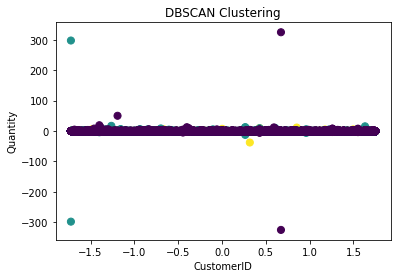

In [67]:
plt.scatter(x = df["CustomerID"],y = df["Quantity"], c=labels, cmap='viridis', s=50)

plt.title('DBSCAN Clustering')
plt.xlabel('CustomerID')
plt.ylabel('Quantity')
plt.show()